# Plotting 

## Notebook to create plots with logged data

In [6]:
import os
import common.plotting as plotting
import pandas as pd

## Compare different runs (Single Agent)

In [3]:
files = ["/home/niko/Info/cablab/runs/ma-/8/logs.csv", "/home/niko/Info/cablab/runs/dqn/270/logs.csv", "/home/niko/Info/cablab/runs/dqn/271/logs.csv"]
output_path = "/home/niko/Desktop/"
ids = ["rewards"]
labels = ["PPO", "DQN", "DQN (Munchhausen)"]
colors = ["orange", "blue", "green"]

In [ ]:
dfs = []

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

plotting.plot_mult_agent(dfs, ids, output_path,labels,colors=colors)

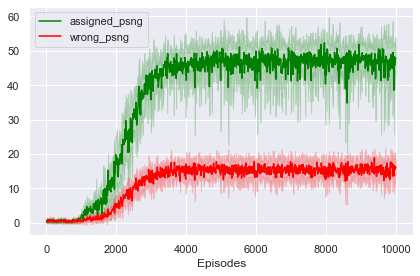

In [7]:
file = "/home/niko/Info/cablab/common/../runs/dqn/40/logs.csv"
df = pd.DataFrame()
df = pd.read_csv(file)
plotting.plot_values(df, ["assigned_psng","wrong_psng"], output_path)

## Compare differnt runs (Multi-Agent)

In [14]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/20/eval_opt/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/20/eval_sub/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/20/eval_rand/logs_summed.csv"]
output_path = "/home/niko/Desktop/"
ids = ["avg_waiting_time"]
labels = ["Opt", "Sub", "Rand"]
colors = ["orange", "blue", "green"]

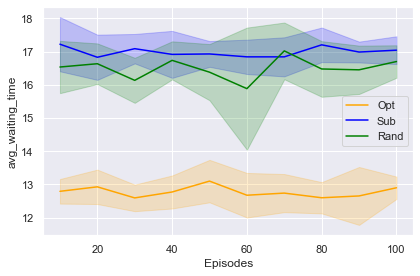

In [15]:
dfs = []

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

plotting.plot_mult_agent(dfs, ids, output_path,labels,colors=colors)

## Make average of multiple runs

In [ ]:
files = []

start_folder = 253
end_folder = 257

for i in range(start_folder, end_folder+1):
    files.append(f"/home/niko/Info/cablab/runs/dqn/{i}/logs.csv")

In [ ]:
output_path = "/home/niko/Desktop/"
ids = ["rewards"]

In [ ]:
dfs = []
n_files = len(files)

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

plotting.plot_mult_runs(dfs, ids, output_path)